In [1]:
import requests
from random import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

# Download the Data

In [2]:
url ="https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

In [3]:
r=requests.get(url,allow_redirects=True)
content=r.content
r.content.decode("utf-8")[:100]
file="t.csv"
open(file, 'wb').write(content)

950547

In [4]:
housing_price_df=pd.read_csv(url)

# Explore the data and Clean the data

In [5]:
housing_price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [6]:
pd.set_option('display.max_columns', None)
housing_price_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [7]:
housing_price_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#drop some columns with NA/Missing valus/Not related/No Meanings/Overlap
housing_price_df.drop(['Id','PoolArea','PoolQC','ScreenPorch','3SsnPorch','GarageCond',
                      'LowQualFinSF','BsmtHalfBath','Utilities','LandSlope','Condition2','LandContour','Street',
                      'RoofMatl','BsmtCond','Fence','MiscFeature','MiscVal','Alley','ExterCond',
                      'BsmtFinType2','BsmtFinSF2','1stFlrSF','2ndFlrSF','FireplaceQu'],axis=1,inplace=True)

In [9]:
housing_price_df.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2915,2433.000000,2919.000000,2919,2919,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919,2918,2918,2895,2896.000000,2919,2919,2838,2837,2840,2918.000000,2918.000000,2918.000000,2919,2919,2919,2918,2919.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918,2919.000000,2917,2919.000000,2762,2760.000000,2760,2918.000000,2918.000000,2760,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000
unique,NaN,5,NaN,NaN,4,5,25,9,5,8,NaN,NaN,NaN,NaN,6,15,16,4,NaN,4,6,4,4,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,NaN,3,NaN,NaN,5,3,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Reg,Inside,NAmes,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,VinylSd,VinylSd,None,NaN,TA,PConc,TA,No,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Attchd,NaN,Unf,NaN,NaN,TA,Y,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,2265,NaN,NaN,1859,2133,443,2511,2425,1471,NaN,NaN,NaN,NaN,2310,1025,1014,1742,NaN,1798,1308,1283,1904,851,NaN,NaN,NaN,2874,1493,2723,2671,NaN,NaN,NaN,NaN,NaN,NaN,1492,NaN,2717,NaN,1723,NaN,1230,NaN,NaN,2604,2641,NaN,NaN,NaN,NaN,NaN,2525,2402,NaN
mean,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,6.089072,5.564577,1971.312778,1984.264474,NaN,NaN,NaN,NaN,102.201312,NaN,NaN,NaN,NaN,NaN,441.423235,560.772104,1051.777587,NaN,NaN,NaN,NaN,1500.759849,0.429894,1.568003,0.380267,2.860226,1.044536,NaN,6.451524,NaN,0.597122,NaN,1978.113406,NaN,1.766621,472.874572,NaN,NaN,93.709832,47.486811,23.098321,6.213087,2007.792737,NaN,NaN,180921.195890
std,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,1.409947,1.113131,30.291442,20.894344,NaN,NaN,NaN,NaN,179.334253,NaN,NaN,NaN,NaN,NaN,455.610826,439.543659,440.766258,NaN,NaN,NaN,NaN,506.051045,0.524736,0.552969,0.502872,0.822693,0.214462,NaN,1.569379,NaN,0.646129,NaN,25.574285,NaN,0.761624,215.394815,NaN,NaN,126.526589,67.575493,64.244246,2.714762,1.314964,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7478.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,1953.500000,1965.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,220.000000,793.000000,NaN,NaN,NaN,NaN,1126.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,NaN,1960.000000,NaN,1.000000,320.000000,NaN,NaN,0.000000,0.000000,0.000000,4.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,68.000000,9453.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,1973.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,368.500000,467.000000,989.500000,NaN,NaN,NaN,NaN,1444.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,NaN,1979.000000,NaN,2.000000,480.000000,NaN,NaN,0.000000,26.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11570.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,2001.000000,2004.000000,NaN,NaN,NaN,NaN,164.000000,NaN,NaN,NaN,NaN,NaN,733.000000,805.500000,1302.000000,NaN,NaN,NaN,NaN,1743.500000,1.000000,2

In [10]:
#since entries from 1460-2919 is missing SalePrice valus, we should drop the rows between 1460-2919
housing_price_df.drop(housing_price_df.index[1460:2919],inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
housing_price_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotShape           0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
PavedDrive   

In [12]:
housing_price_df.dropna(axis=0,inplace=True)

In [13]:
#drop some outliers.(delete the values LotArea>30000) because we focus on majority of data
housing_price_df.drop(housing_price_df[housing_price_df['LotArea']>30000].index,inplace=True)

In [14]:
#drop some outlier.(delete the values SalePrice>500000)
housing_price_df.drop(housing_price_df[housing_price_df['SalePrice']>500000].index,inplace=True)
housing_price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,GasA,Ex,Y,SBrkr,1710,1.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,Y,0,61,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,Y,298,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,GasA,Ex,Y,SBrkr,1786,1.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,Y,0,42,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,GasA,Gd,Y,SBrkr,1717,1.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,Y,0,35,272,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,GasA,Ex,Y,SBrkr,2198,1.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,Y,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,1647,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2.0,460.0,TA,Y,0,40,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,1.0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2.0,500.0,TA,Y,349,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275.0,877.0,1152.0,GasA,Ex,Y,SBrkr,2340,0.0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1.0,252.0,TA,Y,0,60,0,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Reg,Inside,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,1.0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1.0,240.0,TA,Y,366,0,112,4,2010,WD,Normal,142125.0


# Visulizations 

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

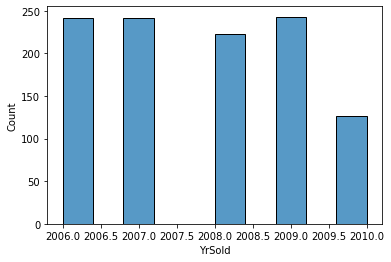

In [15]:
sns.histplot(data=housing_price_df,
            x='YrSold',
            bins=10)

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

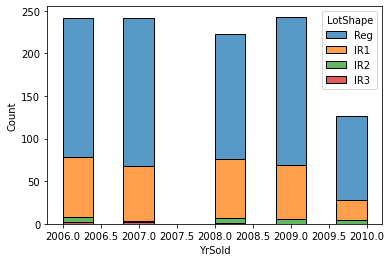

In [16]:
sns.histplot(data=housing_price_df,
            x='YrSold',
            hue='LotShape',
            multiple='stack',
            bins=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

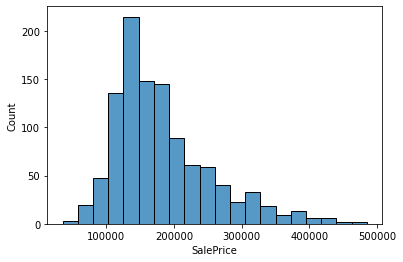

In [17]:
sns.histplot(data=housing_price_df,
            x='SalePrice',
            bins=20)

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

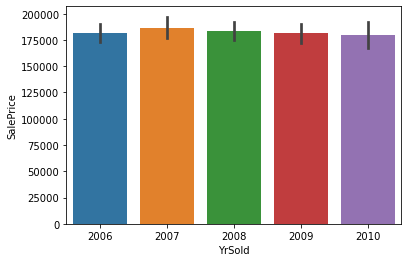

In [18]:
sns.barplot(y='SalePrice',
           x='YrSold',
           data=housing_price_df)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

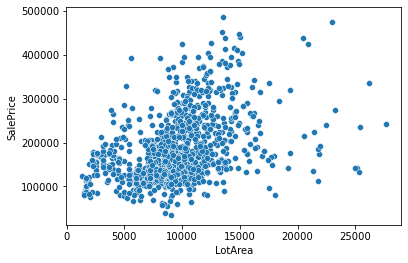

In [19]:
sns.scatterplot(data=housing_price_df,
               x='LotArea',
               y='SalePrice')

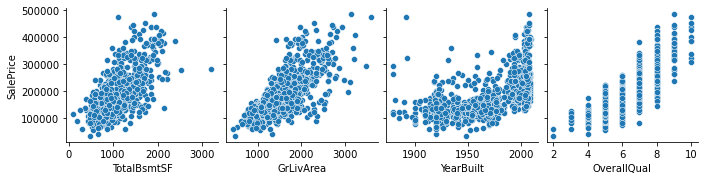

In [20]:
sns.pairplot(x_vars=['TotalBsmtSF','GrLivArea','YearBuilt','OverallQual'],
             y_vars=['SalePrice'],
            data=housing_price_df)
plt.show()

In [21]:
#drop some outlier.(delete the values TotalBsmtSF>2700)
housing_price_df.drop(housing_price_df[housing_price_df['TotalBsmtSF']>2700].index,inplace=True)

In [22]:
#drop some outlier.(delete the values YearBuilt<1900)
housing_price_df.drop(housing_price_df[housing_price_df['YearBuilt']<1900].index,inplace=True)
housing_price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,GasA,Ex,Y,SBrkr,1710,1.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,Y,0,61,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,Y,298,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,GasA,Ex,Y,SBrkr,1786,1.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,Y,0,42,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,GasA,Gd,Y,SBrkr,1717,1.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,Y,0,35,272,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,GasA,Ex,Y,SBrkr,2198,1.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,Y,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,1647,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2.0,460.0,TA,Y,0,40,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,1.0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2.0,500.0,TA,Y,349,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275.0,877.0,1152.0,GasA,Ex,Y,SBrkr,2340,0.0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1.0,252.0,TA,Y,0,60,0,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Reg,Inside,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,1.0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1.0,240.0,TA,Y,366,0,112,4,2010,WD,Normal,142125.0


In [23]:
housing_price_df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.427074,-0.402740,0.043971,-0.096399,0.042672,0.020107,0.051193,-0.065284,-0.156724,-0.291646,0.082606,-0.001337,0.121422,0.213909,-0.064428,0.261003,0.029956,-0.013394,0.057561,-0.030035,-0.098702,-0.018834,0.006735,-0.028882,-0.018220,-0.011448,-0.088615
LotFrontage,-0.427074,1.000000,0.659006,0.203475,-0.048017,0.113925,0.078938,0.156776,0.127118,0.124244,0.313135,0.332179,0.080039,0.175567,0.027788,0.293453,0.010401,0.331269,0.219870,0.062790,0.291965,0.335255,0.075810,0.123087,0.032450,0.040068,0.008927,0.356208
LotArea,-0.402740,0.659006,1.000000,0.202359,-0.070367,0.078439,0.071057,0.112050,0.162799,0.108260,0.332455,0.397523,0.107018,0.180069,0.082530,0.304956,0.015145,0.381787,0.296128,0.049654,0.265102,0.306975,0.126694,0.131286,0.010262,0.010663,-0.042603,0.397824
OverallQual,0.043971,0.203475,0.202359,1.000000,-0.220680,0.630990,0.571466,0.395838,0.176509,0.305085,0.530228,0.595481,0.087013,0.599249,0.217110,0.088771,-0.130915,0.446448,0.384752,0.568919,0.597250,0.534645,0.262159,0.313030,-0.151959,0.097460,0.000178,0.816259
OverallCond,-0.096399,-0.048017,-0.070367,-0.220680,1.000000,-0.426621,0.010623,-0.174692,-0.043345,-0.192646,-0.265226,-0.162700,-0.054307,-0.251708,-0.102447,-0.000592,-0.065504,-0.120880,-0.037482,-0.364196,-0.296957,-0.258992,-0.026996,-0.109463,0.058345,-0.014584,0.048915,-0.173886
YearBuilt,0.042672,0.113925,0.078439,0.630990,-0.426621,1.000000,0.657358,0.319002,0.210512,0.201920,0.455456,0.261356,0.156605,0.545962,0.218978,-0.054811,-0.163598,0.163092,0.120422,0.847998,0.570916,0.504005,0.247091,0.286685,-0.393568,0.032975,-0.001231,0.599104
YearRemodAdd,0.020107,0.078938,0.071057,0.571466,0.010623,0.657358,1.000000,0.175852,0.098516,0.188432,0.310875,0.294188,0.105479,0.492353,0.146694,-0.084313,-0.154706,0.176016,0.104349,0.653669,0.473788,0.413923,0.243749,0.271141,-0.236240,0.035627,0.037793,0.564293
MasVnrArea,0.051193,0.156776,0.112050,0.395838,-0.174692,0.319002,0.175852,1.000000,0.215064,0.111803,0.348087,0.374933,0.083875,0.259405,0.175946,0.111343,0.010759,0.293796,0.225671,0.262904,0.366459,0.353192,0.152497,0.107608,-0.119718,0.037277,-0.019869,0.464871
BsmtFinSF1,-0.065284,0.127118,0.162799,0.176509,-0.043345,0.210512,0.098516,0.215064,1.000000,-0.595658,0.403450,0.123291,0.654192,0.032794,-0.040758,-0.102834,-0.001404,0.027666,0.218210,0.136251,0.173605,0.222584,0.178844,0.079188,-0.106458,0.005548,0.011896,0.370560
BsmtUnfSF,-0.156724,0.124244,0.108260,0.305085,-0.192646,0.201920,0.188432,0.111803,-0.595658,1.000000,0.422126,0.225614,-0.466008,0.305941,-0.088762,0.126477,0.055641,0.218116,0.043383,0.205821,0.282866,0.237899,-0.005997,0.127813,-0.044649,0.030922,-0.015015,0.209801


<AxesSubplot:>

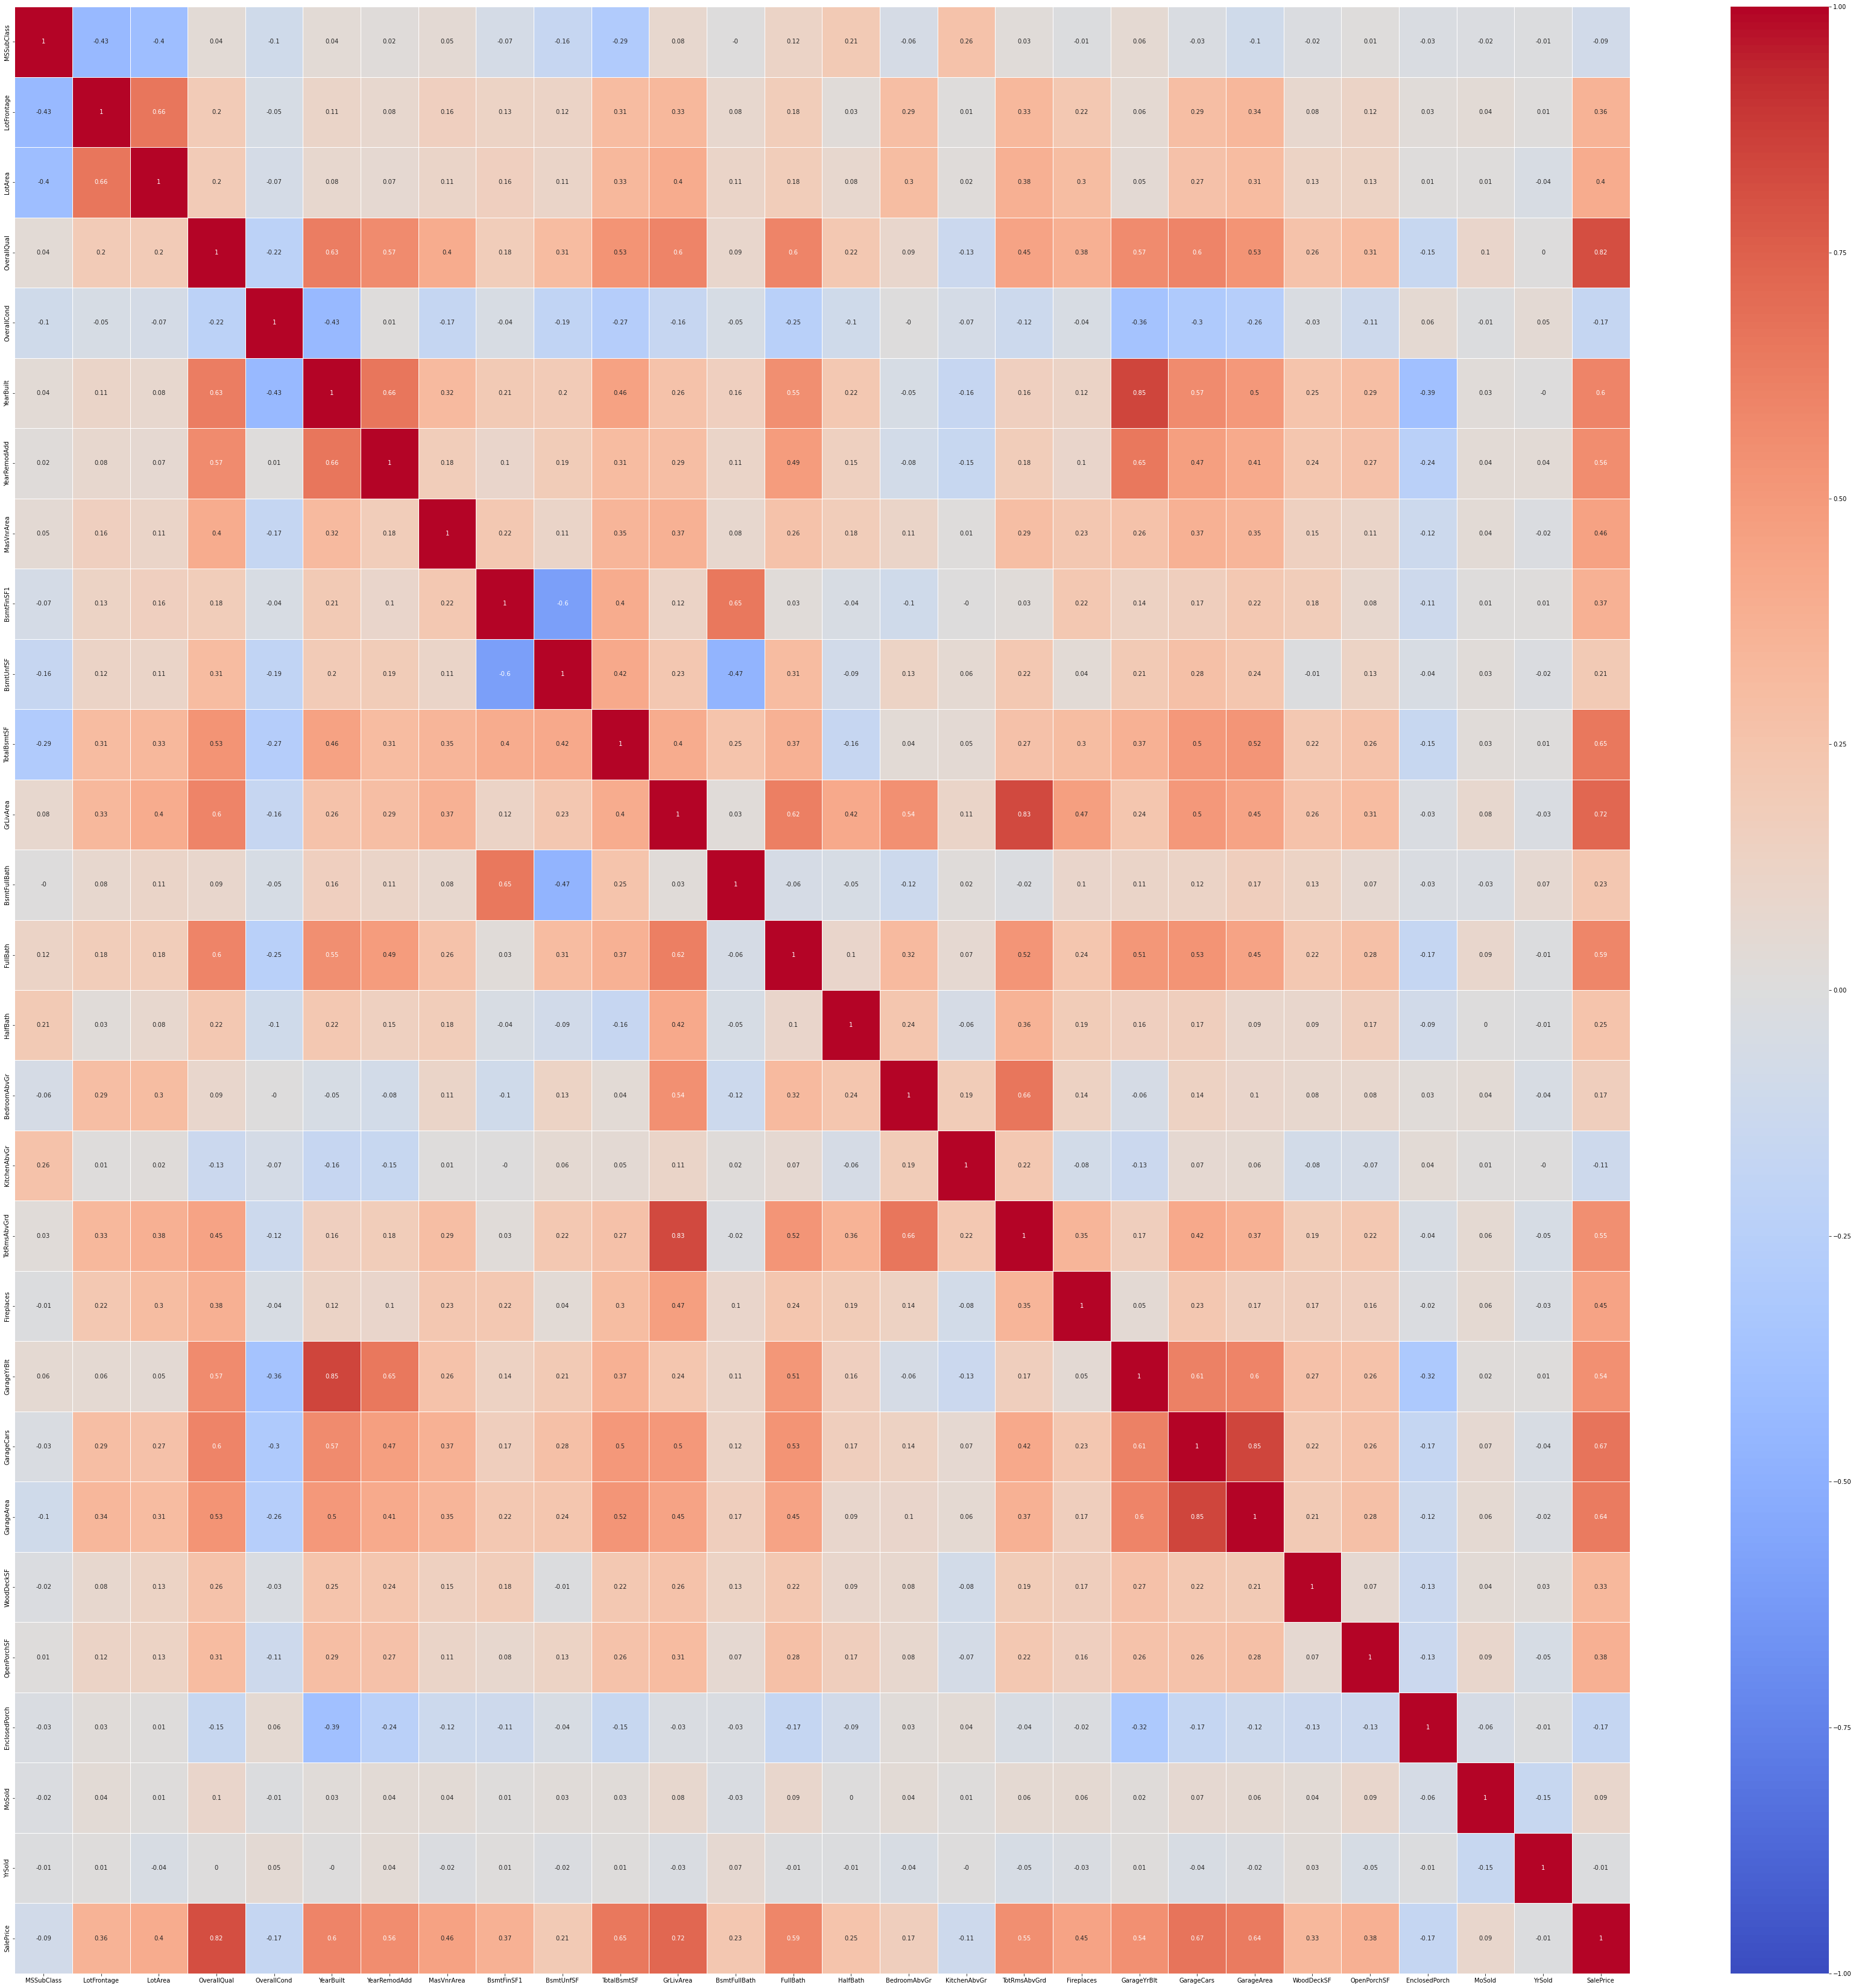

In [24]:
plt.figure(figsize=(60,60))
sns.heatmap(housing_price_df.corr().round(decimals=2),cmap='coolwarm',annot=True,linewidth=0.5,vmin=-1, vmax=1)

# Prediction

In [25]:
#find all categorical variables 
housing_price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,856.0,GasA,Ex,Y,SBrkr,1710,1.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,Y,0,61,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,Y,298,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,920.0,GasA,Ex,Y,SBrkr,1786,1.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,Y,0,42,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,756.0,GasA,Gd,Y,SBrkr,1717,1.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,Y,0,35,272,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,1145.0,GasA,Ex,Y,SBrkr,2198,1.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,Y,192,84,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,1647,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2.0,460.0,TA,Y,0,40,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,1.0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2.0,500.0,TA,Y,349,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275.0,877.0,1152.0,GasA,Ex,Y,SBrkr,2340,0.0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1.0,252.0,TA,Y,0,60,0,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Reg,Inside,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,1.0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1.0,240.0,TA,Y,366,0,112,4,2010,WD,Normal,142125.0


In [26]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1061 non-null   int64  
 1   MSZoning       1061 non-null   object 
 2   LotFrontage    1061 non-null   float64
 3   LotArea        1061 non-null   int64  
 4   LotShape       1061 non-null   object 
 5   LotConfig      1061 non-null   object 
 6   Neighborhood   1061 non-null   object 
 7   Condition1     1061 non-null   object 
 8   BldgType       1061 non-null   object 
 9   HouseStyle     1061 non-null   object 
 10  OverallQual    1061 non-null   int64  
 11  OverallCond    1061 non-null   int64  
 12  YearBuilt      1061 non-null   int64  
 13  YearRemodAdd   1061 non-null   int64  
 14  RoofStyle      1061 non-null   object 
 15  Exterior1st    1061 non-null   object 
 16  Exterior2nd    1061 non-null   object 
 17  MasVnrType     1061 non-null   object 
 18  MasVnrAr

In [27]:
numerical_variables=housing_price_df.select_dtypes(exclude='object')

In [28]:
numerical_variables.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [29]:
categorical_variables=housing_price_df.select_dtypes(exclude=['int64','float64'])
categorical_variables.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
categorical_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1061 non-null   object
 1   LotShape       1061 non-null   object
 2   LotConfig      1061 non-null   object
 3   Neighborhood   1061 non-null   object
 4   Condition1     1061 non-null   object
 5   BldgType       1061 non-null   object
 6   HouseStyle     1061 non-null   object
 7   RoofStyle      1061 non-null   object
 8   Exterior1st    1061 non-null   object
 9   Exterior2nd    1061 non-null   object
 10  MasVnrType     1061 non-null   object
 11  ExterQual      1061 non-null   object
 12  Foundation     1061 non-null   object
 13  BsmtQual       1061 non-null   object
 14  BsmtExposure   1061 non-null   object
 15  BsmtFinType1   1061 non-null   object
 16  Heating        1061 non-null   object
 17  HeatingQC      1061 non-null   object
 18  CentralAir     1061 non-null

In [31]:
#since levels of each categorical variables are too many, we need to filter some categorical variables 
# we can use histogram to see the frequency and distribution of each level of each categorical variable
# we will drop categorical variable with same distribution of its different levels

array([[<AxesSubplot:title={'center':'C (all)'}>,
        <AxesSubplot:title={'center':'FV'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'RL'}>],
       [<AxesSubplot:title={'center':'RM'}>, <AxesSubplot:>]],
      dtype=object)

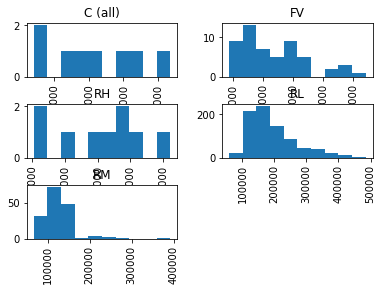

In [32]:
# for example with'MSZoning' , the most frequent 2 levels have the approximate same distribution. we could drop 'MSZoing'
housing_price_df['SalePrice'].hist(by = housing_price_df['MSZoning'])

array([[<AxesSubplot:title={'center':'IR1'}>,
        <AxesSubplot:title={'center':'IR2'}>],
       [<AxesSubplot:title={'center':'IR3'}>,
        <AxesSubplot:title={'center':'Reg'}>]], dtype=object)

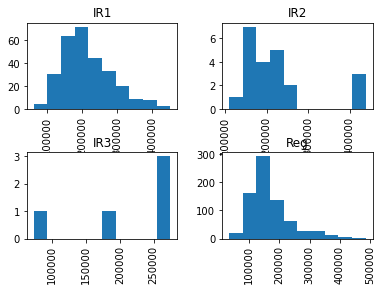

In [33]:
housing_price_df['SalePrice'].hist(by = housing_price_df['LotShape'])
#drop 'LotShape'

array([[<AxesSubplot:title={'center':'Abnorml'}>,
        <AxesSubplot:title={'center':'AdjLand'}>],
       [<AxesSubplot:title={'center':'Alloca'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Normal'}>,
        <AxesSubplot:title={'center':'Partial'}>]], dtype=object)

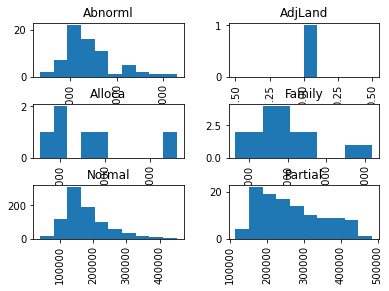

In [34]:
housing_price_df['SalePrice'].hist(by = housing_price_df['SaleCondition'])

In [35]:
housing_price_df.drop(housing_price_df[housing_price_df['SaleCondition']=='AdjLand'].index,inplace=True)
housing_price_df.drop(housing_price_df[housing_price_df['SaleCondition']=='Alloca'].index,inplace=True)

In [36]:
#After filting with categorical variables, we select categorical variables with ExterQual BsmtQual KitchenQual SaleCondition

In [37]:
new_categorical_variables=housing_price_df[['ExterQual','BsmtQual','KitchenQual','SaleCondition']]

In [38]:
new_categorical_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ExterQual      1054 non-null   object
 1   BsmtQual       1054 non-null   object
 2   KitchenQual    1054 non-null   object
 3   SaleCondition  1054 non-null   object
dtypes: object(4)
memory usage: 41.2+ KB


In [39]:
housing_price_df['ExterQual'] = housing_price_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_df['BsmtQual'] = housing_price_df['BsmtQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_df['KitchenQual'] = housing_price_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_price_df['SaleCondition'] = housing_price_df['SaleCondition'].map({'Normal':0,'Partial':1,'Abnorml':2,'Family':3})

In [40]:
new_df=housing_price_df[['ExterQual','BsmtQual','KitchenQual','SaleCondition','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleCondition', 'SalePrice']]

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ExterQual      1054 non-null   int64  
 1   BsmtQual       1054 non-null   int64  
 2   KitchenQual    1054 non-null   int64  
 3   SaleCondition  1054 non-null   int64  
 4   MSSubClass     1054 non-null   int64  
 5   LotFrontage    1054 non-null   float64
 6   LotArea        1054 non-null   int64  
 7   OverallQual    1054 non-null   int64  
 8   OverallCond    1054 non-null   int64  
 9   YearBuilt      1054 non-null   int64  
 10  YearRemodAdd   1054 non-null   int64  
 11  MasVnrArea     1054 non-null   float64
 12  ExterQual      1054 non-null   int64  
 13  BsmtQual       1054 non-null   int64  
 14  BsmtFinSF1     1054 non-null   float64
 15  BsmtUnfSF      1054 non-null   float64
 16  TotalBsmtSF    1054 non-null   float64
 17  GrLivArea      1054 non-null   int64  
 18  BsmtFull

In [42]:
new_df.columns

Index(['ExterQual', 'BsmtQual', 'KitchenQual', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [43]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)

selector.fit(new_df)
new_df.columns[selector.get_support()]

Index(['ExterQual', 'BsmtQual', 'KitchenQual', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),
                   #n_features_to_select = default, 
                   step = 1
                  )
X1=new_df[[x for x in new_df if x != 'SalePrice']]
y1=new_df['SalePrice']
rfe_selector.fit(X1,y1)
cols=X1.columns[rfe_selector.get_support()]
cols

/Users/chengming/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chengming/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [45]:
cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [46]:
#With applying the RFE method, we select features from the results
new_df2=new_df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold','SalePrice']]

In [47]:
import statsmodels.api as sm

X2=new_df2[[x for x in new_df2 if x != 'SalePrice']]
Y2=new_df2['SalePrice']
#X2=sm.add_constant(X2)
model1=sm.OLS(Y2,X2).fit()
predictions=model1.predict(X2)
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              2958.
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        04:23:00   Log-Likelihood:                         -12175.
No. Observations:                1054   AIC:                                  2.439e+04
Df Residuals:                    1033   BIC:                                  2.450e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [48]:
y2=new_df2['SalePrice']
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=521)
model1_1=linear_model.LinearRegression()
model1_1.fit(X2_train,y2_train)
y_pred_2 = model1_1.predict(X2_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred=y_pred_2,y_true = y2_test)

19783.92095951497

In [53]:
#from the results shown above, lets try to drop variables with P-VALUE >0.05

new_df3=new_df2[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'GarageArea', 'OpenPorchSF',
       'YrSold','SalePrice']]

new_df3

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,OpenPorchSF,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706.0,856.0,1710,3,8,548.0,61,2008,208500.0
1,20,9600,6,8,1976,1976,0.0,978.0,1262.0,1262,3,6,460.0,0,2007,181500.0
2,60,11250,7,5,2001,2002,162.0,486.0,920.0,1786,3,6,608.0,42,2008,223500.0
3,70,9550,7,5,1915,1970,0.0,216.0,756.0,1717,3,7,642.0,35,2006,140000.0
4,60,14260,8,5,2000,2000,350.0,655.0,1145.0,2198,4,9,836.0,84,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0.0,953.0,1647,3,7,460.0,40,2007,175000.0
1456,20,13175,6,6,1978,1988,119.0,790.0,1542.0,2073,3,7,500.0,0,2010,210000.0
1457,70,9042,7,9,1941,2006,0.0,275.0,1152.0,2340,4,9,252.0,60,2010,266500.0
1458,20,9717,5,6,1950,1996,0.0,49.0,1078.0,1078,2,5,240.0,0,2010,142125.0


In [54]:
X3=new_df2[[x for x in new_df3 if x != 'SalePrice']]
Y3=new_df2['SalePrice']
#X2=sm.add_constant(X2)
model2=sm.OLS(Y3,X3).fit()
predictions=model2.predict(X3)
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              4143.
Date:                Mon, 09 May 2022   Prob (F-statistic):                        0.00
Time:                        04:25:14   Log-Likelihood:                         -12178.
No. Observations:                1054   AIC:                                  2.439e+04
Df Residuals:                    1039   BIC:                                  2.446e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [67]:
y3=new_df3['SalePrice']
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=521)
model2_1=linear_model.LinearRegression()
model2_1.fit(X3_train,y3_train)
y_pred_3 = model2_1.predict(X3_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred=y_pred_3,y_true = y3_test)

19363.90544187585